In [23]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random 
import pandas as pd

In [24]:
#using PCA
def plot_3d(output, title ='Fig: 3 components PCA on Seed Dataset'):
    fig = plt.figure(figsize =(12,10))
    ax = fig.add_subplot(111, projection='3d')
    colormap = np.array(['r', 'g', 'b'])
    markers=np.array(['s', '*','1'])
    
    for i in range(len(output[:, 0])):
        ax.scatter(
            output[i, 0],  # X coordinates of principal components
            output[i, 1],  # Y coordinates of principal components
            output[i, 2],   # Z coordinates of principal components
            marker=markers[df.iloc[i,7]],
            c =colormap[df.iloc[i,7]]

        )
    plt.title(title)
    plt.legend([f'Roll [5,9]'])
    # Set labels for each axis
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    # Show the plot
    plt.show()

def plot_2d(output, title ='Fig: 2 components PCA on Seed Dataset'):
    colormap = np.array(['r', 'g', 'b'])
    markers=np.array(['s', '*','1'])

    for i in range(len(output[:, 0])):
        plt.scatter(
            output[i, 0],  # X coordinates of principal components
            output[i, 1],  # Y coordinates of principal components
            marker=markers[df.iloc[i,7]],
            c =colormap[df.iloc[i,7]]

        )
    plt.title(title)
    plt.legend([f'Roll [5,9]'])
    # Set labels for each axis
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    # Show the plot
    plt.show()
    
#plot 1D
def plot_1d(output, title ='Fig: 2 components PCA on Seed Dataset'):
    colormap = np.array(['r', 'g', 'b'])
    markers=np.array(['s', '*','1'])

    for i in range(len(output)):
        plt.scatter(
            output[i],  # X coordinates of principal components
            output[i],  # Y coordinates of principal components
            marker=markers[df.iloc[i,7]],
            c =colormap[df.iloc[i,7]]

        )
    plt.title(title)
    plt.legend([f'Roll [5,9]'])
    # Set labels for each axis
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    # Show the plot
    plt.show()
    
def sort_evect(eval, evect):
    pair = dict()
    for i in range(len(eval)):
        pair[np.abs(eval[i])]= evect[:, i]  
    sorted_pair = dict(sorted(pair.items(), reverse= True))
    evect_sorted= np.array(list(sorted_pair.values()))
    return evect_sorted

def cal_prop(e):
    prop = []
    sum = np.sum(e)
    for i in range(len(e)):
        prop.append((e[i]/sum)*100)
    return prop


In [25]:
df= pd.read_csv('Seed_Data.csv')

In [60]:
df_ = df.drop('target', axis=1)
column_names = df.columns.tolist()
print(column_names)

['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG', 'target']


In [26]:
df.describe

<bound method NDFrame.describe of          A      P       C     LK     WK  A_Coef    LKG  target
0    15.26  14.84  0.8710  5.763  3.312   2.221  5.220       0
1    14.88  14.57  0.8811  5.554  3.333   1.018  4.956       0
2    14.29  14.09  0.9050  5.291  3.337   2.699  4.825       0
3    13.84  13.94  0.8955  5.324  3.379   2.259  4.805       0
4    16.14  14.99  0.9034  5.658  3.562   1.355  5.175       0
..     ...    ...     ...    ...    ...     ...    ...     ...
205  12.19  13.20  0.8783  5.137  2.981   3.631  4.870       2
206  11.23  12.88  0.8511  5.140  2.795   4.325  5.003       2
207  13.20  13.66  0.8883  5.236  3.232   8.315  5.056       2
208  11.84  13.21  0.8521  5.175  2.836   3.598  5.044       2
209  12.30  13.34  0.8684  5.243  2.974   5.637  5.063       2

[210 rows x 8 columns]>

In [27]:
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


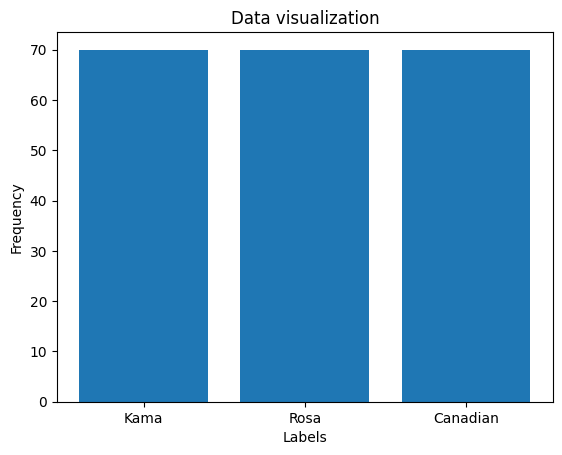

In [28]:
labels = df.iloc[:,7]
labels = np.array(labels)
counts= [np.count_nonzero([labels==0]), np.count_nonzero([labels==1]), np.count_nonzero([labels==1]) ]

classes = ['Kama', 'Rosa',  'Canadian']
# Plot the histogram
plt.bar(classes, counts)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Data visualization')
plt.show()

In [29]:
data = df.iloc[:,:7].to_numpy()

In [30]:
data_std = StandardScaler().fit_transform(data)

In [31]:
data_std.mean(), data_std.var()

(-2.6584932290343884e-16, 1.0)

In [32]:
covariance= np.cov(data_std.T)
covariance

array([[ 1.00478469,  0.99909854,  0.61119889,  0.9545308 ,  0.97541544,
        -0.23067077,  0.86782525],
       [ 0.99909854,  1.00478469,  0.53177587,  0.97707507,  0.94935008,
        -0.21838028,  0.89504603],
       [ 0.61119889,  0.53177587,  1.00478469,  0.36967551,  0.7652787 ,
        -0.33305686,  0.22791011],
       [ 0.9545308 ,  0.97707507,  0.36967551,  1.00478469,  0.86453176,
        -0.1723833 ,  0.93726927],
       [ 0.97541544,  0.94935008,  0.7652787 ,  0.86453176,  1.00478469,
        -0.25927117,  0.75271583],
       [-0.23067077, -0.21838028, -0.33305686, -0.1723833 , -0.25927117,
         1.00478469, -0.01113203],
       [ 0.86782525,  0.89504603,  0.22791011,  0.93726927,  0.75271583,
        -0.01113203,  1.00478469]])

In [33]:
eigen_value, eigen_vect = np.linalg.eig(covariance)
prop=cal_prop(eigen_value)
eigen_vect_sorted = sort_evect(eigen_value, eigen_vect)
print(prop)

[71.87430265675432, 17.108183528158026, 9.6857634082921, 0.9766353856015455, 0.26733727146763797, 0.011605668563906216, 0.07617208116246715]


In [34]:
#no of prinicipal components, set intialy to 3
k=3

In [35]:
output_data = np.matmul(eigen_vect_sorted[:k-1,:], data_std.T)
output= output_data.T
output_3d = np.matmul(eigen_vect_sorted[:k,:], data_std.T)
output_3d = output_3d.T

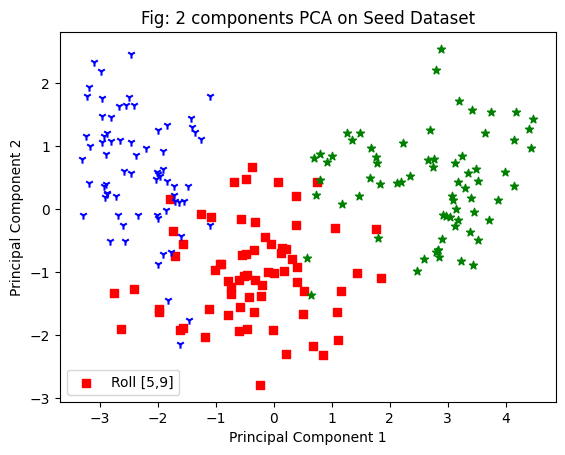

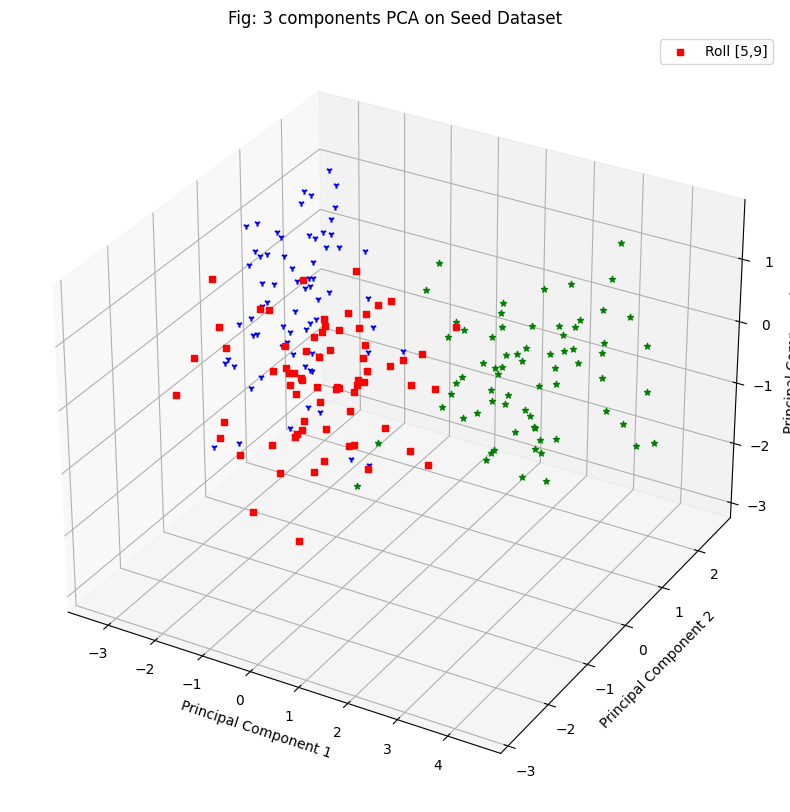

In [36]:
plot_2d(output, title ='Fig: 2 components PCA on Seed Dataset')
plot_3d(output_3d, title ='Fig: 3 components PCA on Seed Dataset')

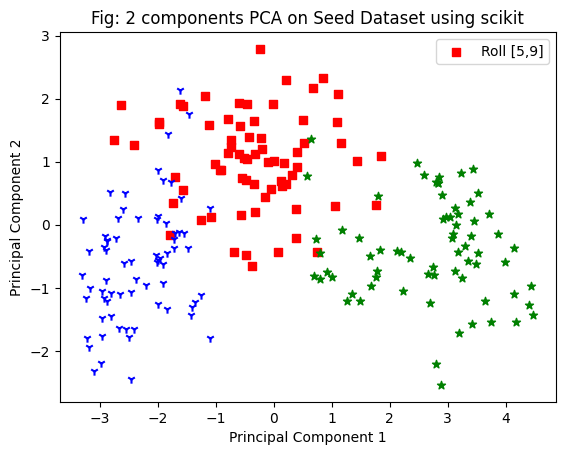

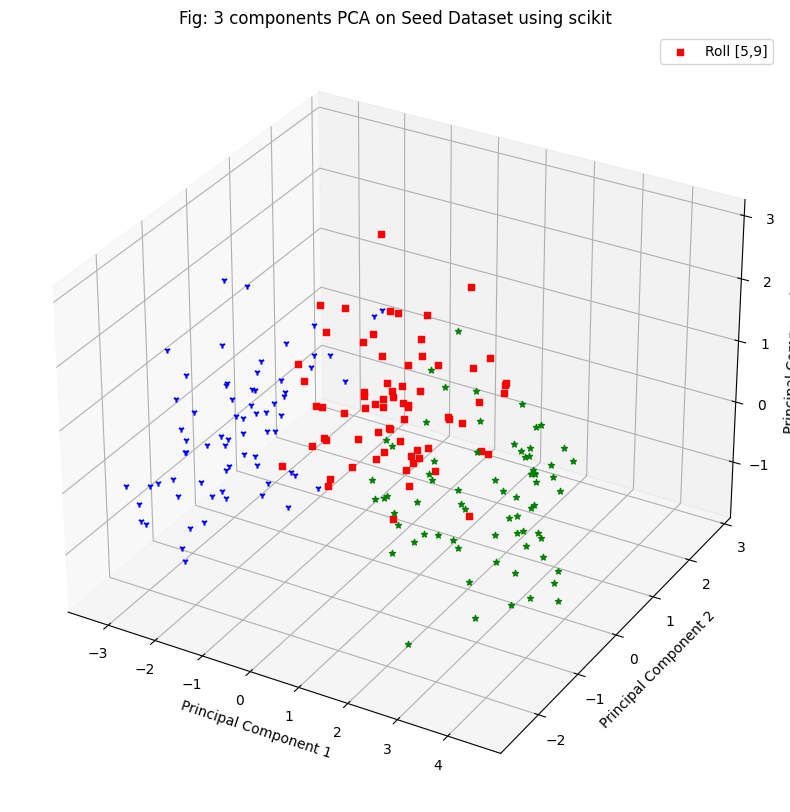

In [37]:
from sklearn.decomposition import PCA

# Assume you have a dataset called `data` with dimensions (m, n)

# Create an instance of PCA with the desired number of components
pca2d = PCA(n_components=2)
pca3d = PCA(n_components=3)

# Fit the PCA model to the data
pca2d.fit(data_std)
pca3d.fit(data_std)

# Transform the data to the lower-dimensional space
data2d = pca2d.transform(data_std)
data3d = pca3d.transform(data_std)


plot_2d(data2d, title ='Fig: 2 components PCA on Seed Dataset using scikit')
plot_3d(data3d, title ='Fig: 3 components PCA on Seed Dataset using scikit')

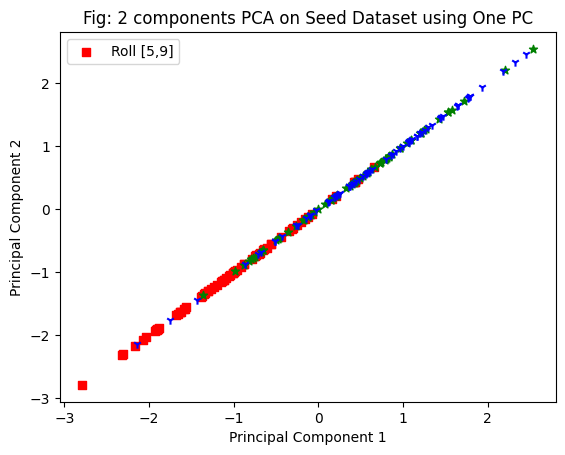

In [38]:
#PCA using 3 and 4 th larger eigen value
output_data = np.matmul(eigen_vect_sorted[1,:], data_std.T)
output_new= output_data.T
# output_3d = np.matmul(eigen_vect_sorted[:k,:], data_std.T)
# output_3d = output_3d.T
plot_1d(output_new, title ='Fig: 2 components PCA on Seed Dataset using One PC')

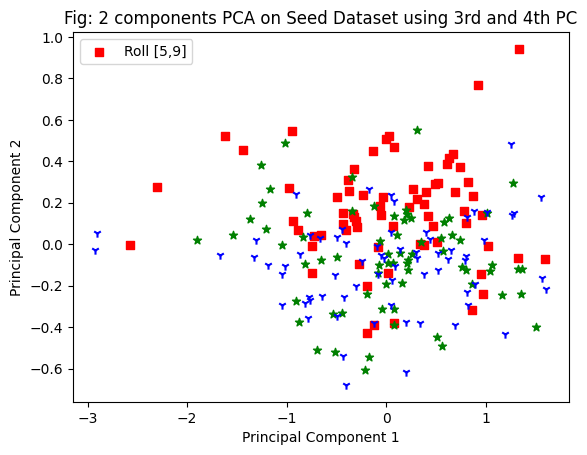

In [39]:
#PCA using 3 and 4 th larger eigen value
output_data = np.matmul(eigen_vect_sorted[2:4,:], data_std.T)
output_new= output_data.T
# output_3d = np.matmul(eigen_vect_sorted[:k,:], data_std.T)
# output_3d = output_3d.T
plot_2d(output_new, title ='Fig: 2 components PCA on Seed Dataset using 3rd and 4th PC')

In [52]:
import plotly.express as px

# Assuming 'df' is the loaded dataframe containing the wheat seed dataset

features =['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG']

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="target",
    
)
fig.update_traces(diagonal_visible=False)
fig.add_annotation(
    x=0.5, y=1.1, xref="paper", yref="paper",
    text="*Roll No. 5, 9", showarrow=False,
    font=dict(size=12, color=px.colors.qualitative.Plotly[1])
)
fig.show()


In [67]:
import plotly.express as px

#features = ['area', 'perimeter', 'compactness', 'length of kernel', 'width of kernel',
 #           'asymmetry coefficient', 'length of kernel groove']

features = ['A', 'P', 'C', 'LK', 'WK', 'A_Coef', 'LKG']

symbol_map = {
    "Kama": "square",
    "Rosa": "star",
    "Canadian": "cross"
}


target_column = "target"

fig = px.scatter_matrix(
    df,
    dimensions=features,
   color=target_column,
  symbol=target_column,
    symbol_map=symbol_map
)
fig.update_traces(diagonal_visible=False)
fig.add_annotation(
    x=0.5, y=1.1, xref="paper", yref="paper",
    text="*Roll No. 5, 9", showarrow=False,
    font=dict(size=12, color=px.colors.qualitative.Plotly[1])
)
fig.show()
